In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading the dataset
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# Data Cleaning

In [8]:
#checking missing values
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are 19456 missing values in the HDI for year column

In [10]:
# Confirming missing values
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [11]:
# Feature Engineering
# Suicide proportion
df['suicide_proportion'] = df['suicides_no'] / df['population']
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_proportion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000056
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,0.000051
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,0.000049
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046


<Axes: title={'center': 'Trend of Suicide Rates Over Years'}, xlabel='year'>

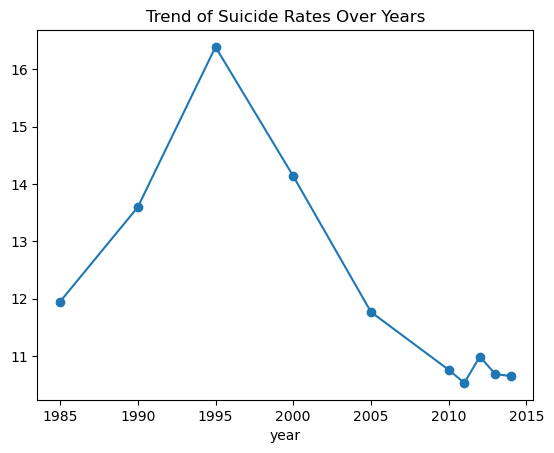

In [22]:
# Year Vs Suicide/100k pop
avg_suicide_rate_by_year = df.groupby('year')['suicides/100k pop'].mean()
avg_suicide_rate_by_year.plot(kind='line', title='Trend of Suicide Rates Over Years', marker='o')


From the above line graph we can a rise in suicide rate from 1985 to 1995 then a sharp decline to 2011 where it rose abit.
what factors influenced the sudden decrease from 1995 to 2011 and what caused the sudden rise again.

In [36]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'suicide_proportion'],
      dtype='object')


Average Suicide Rate by Age Group:
           age  suicides/100k pop
0  15-24 years           8.651736
1  25-34 years          11.467518
2  35-54 years          14.116133
3   5-14 years           0.628623
4  55-74 years          15.143006
5    75+ years          21.944598


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\1646303975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')


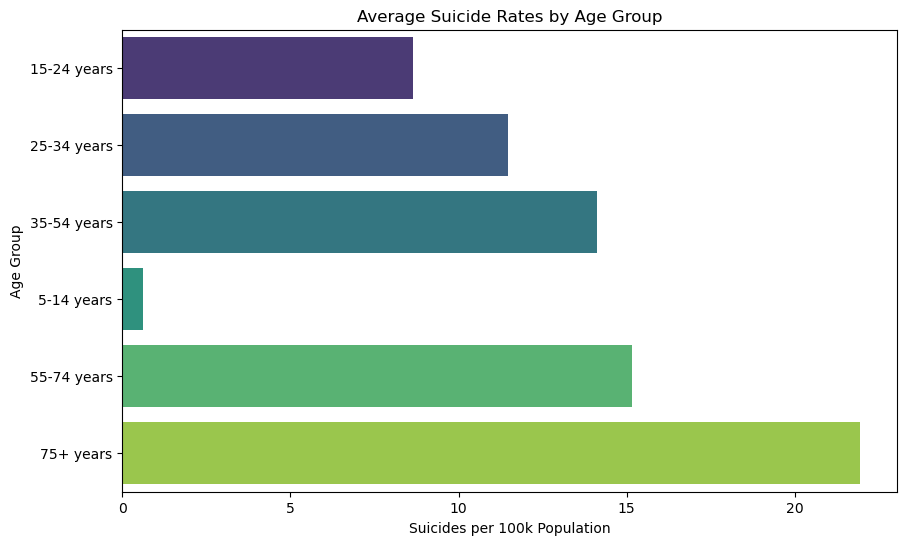

In [39]:
# Group data by age and calculate the average suicide rate
age_analysis = df.groupby('age')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Age Group:")
print(age_analysis)

# Plot suicide rates by age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')
plt.title('Average Suicide Rates by Age Group')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Age Group')
plt.show()


Average Suicide Rate by Gender:
      sex  suicides/100k pop
0  female           4.937198
1    male          19.046674


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\2418484271.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')


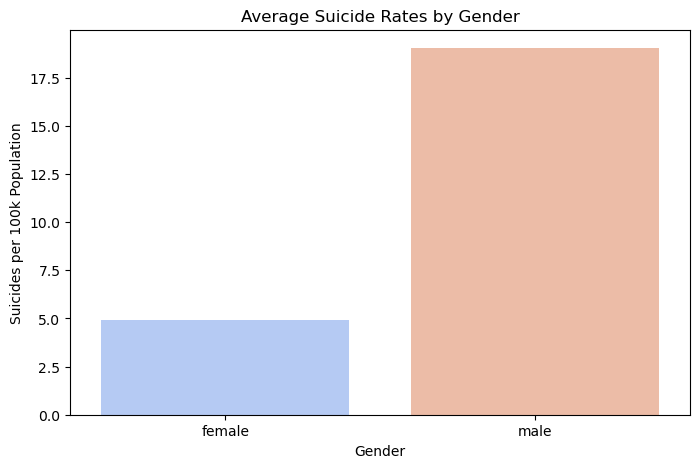

In [40]:
# --------- Objective 2: Gender Analysis ---------

# Group data by gender and calculate the average suicide rate
gender_analysis = df.groupby('sex')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Gender:")
print(gender_analysis)

# Plot suicide rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')
plt.title('Average Suicide Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k Population')
plt.show()


Average Suicide Rate by Generation:
        generation  suicides/100k pop
0          Boomers          14.404119
1  G.I. Generation          24.555974
2     Generation X          11.044707
3     Generation Z           0.638924
4       Millenials           7.181961
5           Silent          17.619277


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\633813854.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')


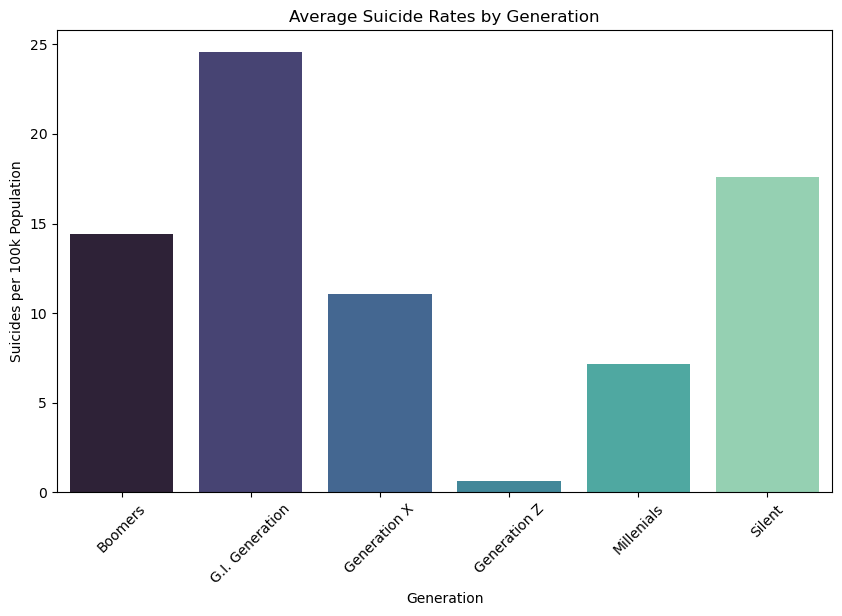

In [42]:
#------- Objective 3: Generation Insights ---------

# Group data by generation and calculate the average suicide rate
generation_analysis = df.groupby('generation')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Generation:")
print(generation_analysis)

# Plot suicide rates by generation
plt.figure(figsize=(10, 6))
sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')
plt.title('Average Suicide Rates by Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.show()



Population vs Suicide Rates (Mean per Country):
                 country    population  suicides/100k pop
0                Albania  2.337301e+05           2.352292
1    Antigua and Barbuda  7.481083e+03           0.000000
2              Argentina  2.906959e+06          10.005083
3                Armenia  2.479998e+05           3.246458
4              Australia  1.634832e+06          12.277500
..                   ...           ...                ...
85  United Arab Emirates  5.050070e+05           1.615000
86        United Kingdom  4.765921e+06           7.355333
87         United States  2.246871e+07          13.860500
88               Uruguay  2.523808e+05          19.743611
89            Uzbekistan  2.113732e+06           6.666667

[90 rows x 3 columns]


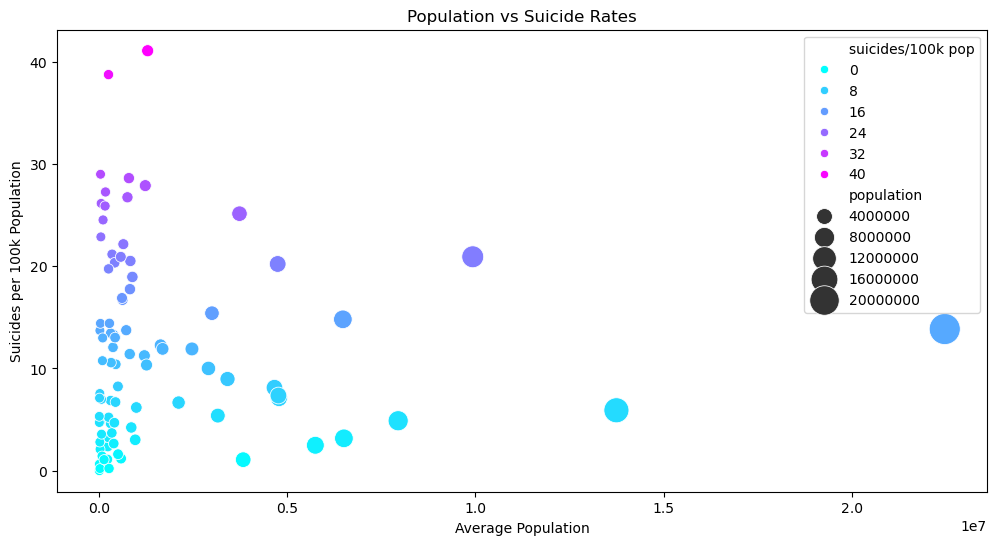

In [44]:
#------- Objective 4: Population-Based Risk ---------

# Analyze the relationship between population size and suicide rate
population_analysis = df.groupby('country')[['population', 'suicides/100k pop']].mean().reset_index()
print("\nPopulation vs Suicide Rates (Mean per Country):")
print(population_analysis)

# Scatter plot: population vs suicide rates
plt.figure(figsize=(12, 6))
sns.scatterplot(data=population_analysis, x='population', y='suicides/100k pop', hue='suicides/100k pop', size='population', sizes=(50, 500), palette='cool')
plt.title('Population vs Suicide Rates')
plt.xlabel('Average Population')
plt.ylabel('Suicides per 100k Population')
plt.show()



Average Suicide Rates by Age and Gender:
            age     sex  suicides/100k pop
0   15-24 years  female           4.261722
1   15-24 years    male          13.041750
2   25-34 years  female           4.339125
3   25-34 years    male          18.595911
4   35-54 years  female           5.718049
5   35-54 years    male          22.514218
6    5-14 years  female           0.483472
7    5-14 years    male           0.773773
8   55-74 years  female           6.560545
9   55-74 years    male          23.725466
10    75+ years  female           8.260273
11    75+ years    male          35.628924


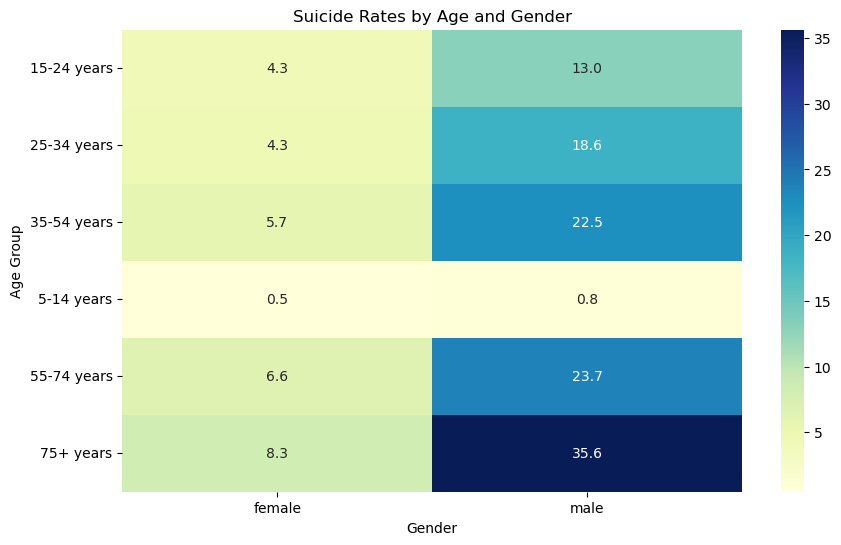

In [45]:
# --------- Cross-Age and Gender Analysis ---------

# Analyze suicide rates across age groups and gender
age_gender_analysis = df.groupby(['age', 'sex'])['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rates by Age and Gender:")
print(age_gender_analysis)

# Heatmap for suicide rates by age and gender
age_gender_pivot = age_gender_analysis.pivot(index='age', columns='sex', values='suicides/100k pop')
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Suicide Rates by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()